# S11 Group Powerpuff Girls - Housing Prices
Group Members
* Annika Capada
* Lauren Garcia
* Sophia Oquias

# Section 1. State target task here
The target task is to train three machine learning models to predict the price of houses in King County.

# Section 2. Data Set Description

## Brief Description
This dataset contains house sale prices for King County. It includes homes sold between May 2014 and May 2015

## Structure
In the dataset, each row represents a house. Each column represents the different variables and correspoding data related to each.There is a total of 21,613 observations with 21 variables each.

## Features
| Field Name     | Description                                                |
|----------------|------------------------------------------------------------|
| id             | A notation for a house                                    |
| date           | Date sold                                                 |
| price          | Sale price                                                |
| bedrooms       | Number of bedrooms                                       |
| bathrooms      | Number of bathrooms                                      |
| sqft_living    | Size of living area in square feet                        |
| sqft_lot       | Size of the lot in square feet                            |
| floors         | Total floors in the house                                |
| waterfront     | '1' if the property has a waterfront, '0' if not          |
| view           | An index from 0 to 4 of how good the view of the property was |
| condition      | Condition of the house, ranked from 1 to 5               |
| grade          | Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value |
| sqft_above     | Square feet above ground                                  |
| sqft_basement  | Square feet below ground                                  |
| yr_built       | Year built                                                |
| yr_renovated   | Year renovated. '0' if never renovated                    |
| zipcode        | 5-digit zip code                                          |
| lat            | Latitude coordinate                                       |
| long           | Longitude coordinate                                      |
| sqft_living15  | Average size of interior housing living space for the closest 15 houses, in square feet |
| sqft_lot15     | Average size of land lots for the closest 15 houses, in square feet |


# Section 3. List of requirements
List all the Python libraries and modules that you used

In [126]:
#insert libraries and modules here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#Linear Regression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Neural Network
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Section 4. Data preprocessing and cleaning

Perform the necessary steps before using the data. In this section of the notebook, please take note of the following:
- If needed, perform preprocessing techniques to transform the data to the appropriate representation. This may include binning, log transformations, conversion to one-hot encoding, normalization, standardization, interpolation, truncation, and feature engineering, among others. There should be a correct and proper justification of the use of each preprocessing technique used in the project.
- Make sure that the data is clean, especially features that are used in the project. This may include checking for misrepresentations, checking the data type, dealing with missing data, dealing with duplicate data, and dealing with outliers, among others. There STINTSY T1AY2324 should be a correct and proper justification of the application (or non-application) of each data cleaning method used in the project. Clean only the variables utilized in the study.

In [127]:
df = pd.read_csv("house_prices.csv")

## Checking for Duplicates and Null values

In [128]:
#Checking for duplicates
print("Duplicate count: " + str(df.duplicated().sum()))
print("Null value count: \n" + str(df.isnull().sum()))

Duplicate count: 0
Null value count: 
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


No duplicates or null values were found in the dataset! Now we can transform the data.

## Object Types
We look at the object types of each column in the dataset. It looks like most of the values are either integers or floats. The 'date' column will be transformed so that it's a datetime object and can better be used for our exploratory data analaysis later on.

In [129]:
# Get object type per column
column_types = df.dtypes

# Print or inspect the result
print(column_types)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [130]:
df['date_time'] = pd.to_datetime(df['date']).dt.year.astype(int)

## Remove Outliers
Next, we remove the outliers so that they don't have a disproportionate impact on our models. Let's see how much data we have right now.

In [131]:
column_counts = df.count()
print(column_counts)

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
date_time        21613
dtype: int64


We currently have 21613 values. Here, we use box plot to visualize the outliers.

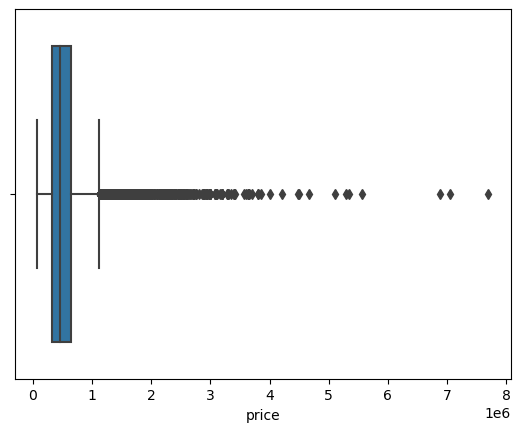

In [132]:
sns.boxplot(x=df['price'])
plt.show()

The z-score is used to remove the outliers. Z-scores help in quantifying how far each residual is from the mean of the residuals. By setting a threshold, we are identifying data points whose residuals are more than the threshold's standard deviations away from the mean as potential outliers.

In [133]:
from scipy.stats import zscore

def remove_outliers_zscore_scipy(data_frame, column, threshold=3):
    z_scores = zscore(data_frame[column])
    filtered_data = data_frame[(np.abs(z_scores) < threshold)]
    return filtered_data

# Remove outliers from the 'Value' column using Z-score from scipy
df_no_outliers_zscore_scipy = remove_outliers_zscore_scipy(df, 'price')

In [134]:
df = df_no_outliers_zscore_scipy

In [135]:
column_counts = df.count()
print(column_counts)

id               21207
date             21207
price            21207
bedrooms         21207
bathrooms        21207
sqft_living      21207
sqft_lot         21207
floors           21207
waterfront       21207
view             21207
condition        21207
grade            21207
sqft_above       21207
sqft_basement    21207
yr_built         21207
yr_renovated     21207
zipcode          21207
lat              21207
long             21207
sqft_living15    21207
sqft_lot15       21207
date_time        21207
dtype: int64


After removing the outliers, we get a 21207 values which is 406 less than our original dataset.

## Correlation Matrix

Next, we use a correlation matrix to help us decide which featueres we want to use in our models as using all of them would be highly complex. We decided to use a correlation matrix to get a better idea of which variables have a notable relationship to prices.

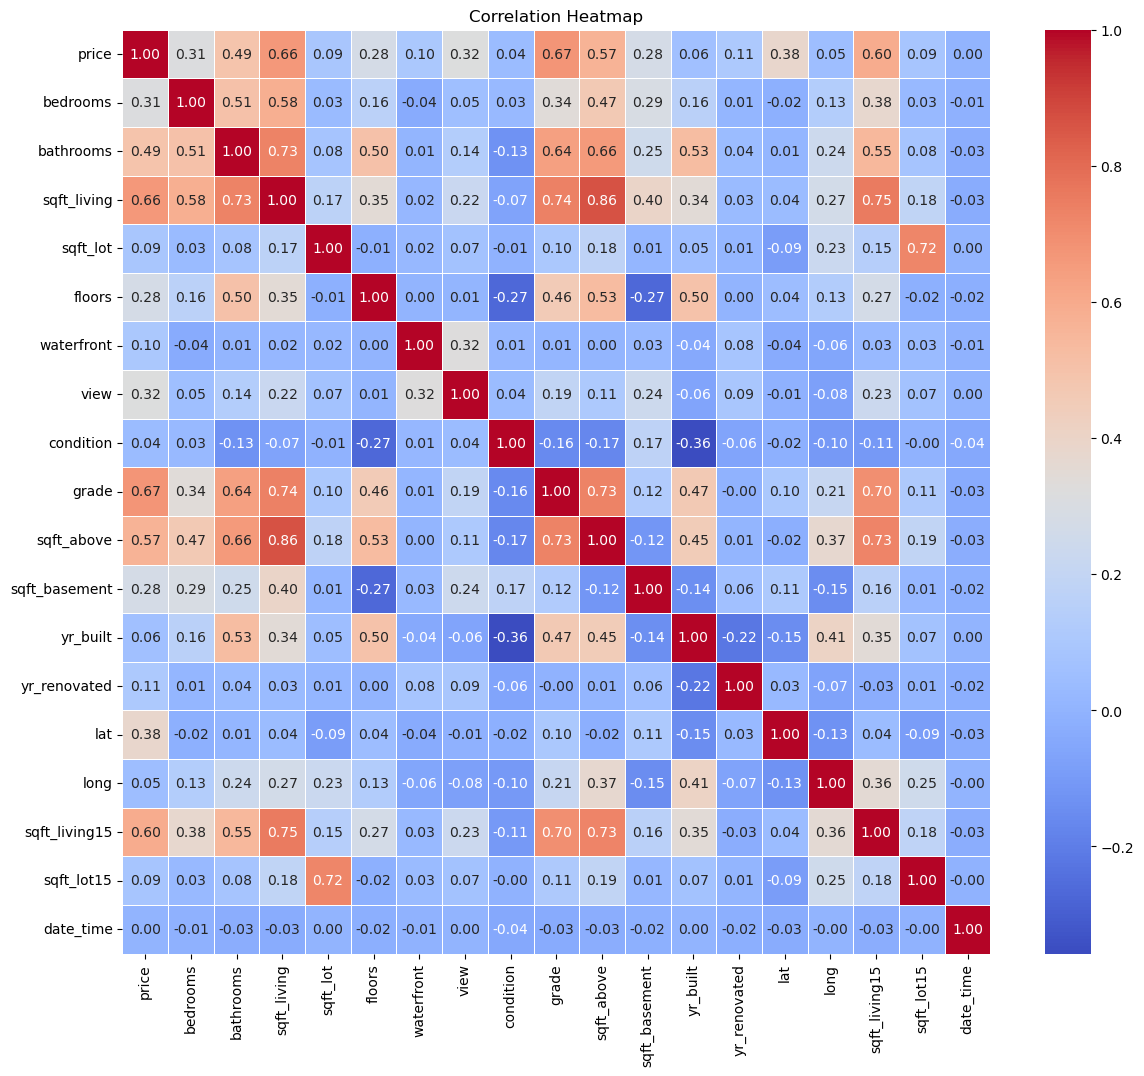

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset

# Selecting numerical features for correlation analysis
numerical_features = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                         'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
                         'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_time']]

# Calculating the correlation matrix
correlation_matrix = numerical_features.corr()

# Plotting the heatmap for visualization
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

The correlation matrix shows the correlation coefficients between different features in the dataset. The values range from -1 to 1, where:

- 1 indicates a perfect positive correlation,
- -1 indicates a perfect negative correlation, and
- 0 indicates no correlation.


Here are some observations based on the correlation coefficients for the 'price' column:

Strong Positive Correlations:
- sqft_living (0.664903):
- grade (0.672025):
- sqft_above (0.567088):
- sqft_living15 (0.595174):

Moderate Positive Correlations:
- bathrooms (0.494727):
- floors (0.277978):
- view (0.318161):

Weak Positive Correlations:
- bedrooms (0.311101):
- waterfront (0.101001):

Weak Negative Correlations:
- condition (0.036643):
- yr_built (0.060548):

It's important to note that correlation does not imply causation, and these relationships might not necessarily be causal. Additionally, other factors not included in the dataset may contribute to the observed patterns. This just helps us decide on which features to choose from.


In [137]:
features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15']
X = df[features]
y = df['price']

We decided to only look at the features with strong positive correlations to price which are **sqft_living**, **grade**, **sqft_above**, **sqft_living15**. Thus, we update our input X which will be used for all the models.

# Section 5. Exploratory Data Analysis

## 1. What is the number of houses per grade?

In [138]:
#number of houses per grade
df['grade'].value_counts()

7     8979
8     6050
9     2552
6     2038
10     997
11     283
5      242
12      33
4       29
3        3
1        1
Name: grade, dtype: int64

The results here show that a grade of 7 has the highest count of houses. The grade sits in the middle of the grade range which is 1-12. The first few rows in the output could indicate that many of the houses are more for the middle class to upper middle class which may represent the majority of the people in King county

## 2. What is the distribution of prices?

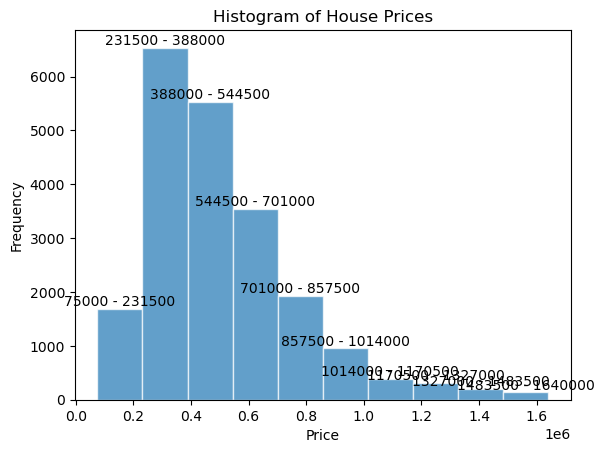

In [139]:
hist_values, bin_edges, _ = plt.hist(df['price'], bins=10, edgecolor='w', alpha=0.7)

# Annotate each bin with its range
for i in range(len(bin_edges) - 1):
    plt.text(bin_edges[i] + 0.5 * (bin_edges[i + 1] - bin_edges[i]), hist_values[i], f'{int(bin_edges[i])} - {int(bin_edges[i + 1])}', ha='center', va='bottom')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of House Prices')
plt.show()


Each bin represents a range of prices and its height is based on the frequency of the price. Based on the results, the prices tend to range from $231500-388000 and $388000-544500 which seem to be more on the lower to middle end of the price range.

## 3. Is there a relationship between the sqft_living and price?

Correlation between sqft_living and price: 0.66


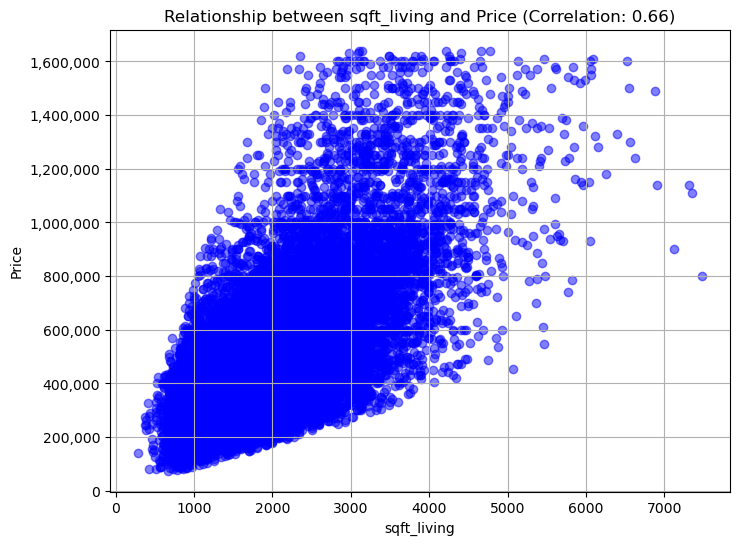

In [152]:
correlation = df['sqft_living'].corr(df['price'])
print(f"Correlation between sqft_living and price: {correlation:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(df['sqft_living'], df['price'], c='b', marker='o', alpha=0.5)

plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('Relationship between sqft_living and Price (Correlation: {:.2f})'.format(correlation))

formatter = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(True)
plt.show()

The correlation between `price` and `sqft_living` is 0.66 which indicates a strong positive correlation. This means that as `sqft_living` increases `price` increases as well.

## 4. What is the average price per grade?

In [141]:
#What is the average price per grade
price_per_house = df.groupby("grade").agg({"price": ["mean","median", "std"]})
price_per_house.sort_values(("price", "median"), ascending=False)

price                          
               mean     median            std
grade                                        
12     1.380152e+06  1470000.0  210128.252683
11     1.141976e+06  1140000.0  251073.332613
10     9.306941e+05   875000.0  270982.173946
9      7.448611e+05   715000.0  257500.680660
8      5.385620e+05   510000.0  201930.371174
7      4.022709e+05   375000.0  154379.589585
6      3.019166e+05   275276.5  122952.248338
3      2.056667e+05   262000.0  113517.986827
5      2.485240e+05   228700.0  118100.279986
4      2.143810e+05   205000.0   94306.167816
1      1.420000e+05   142000.0            NaN

Based on the table above, there is a positive relationship between `price` and `grade`. The mean and median price increase as grade increases.

In [142]:
average_price_overall = df["price"].mean()
print("Average Price Overall: ", average_price_overall)

Average Price Overall:  506918.80030178715


## 5. What is the relationship between the grade of a house and its average square feet above ground (sqft_above)?

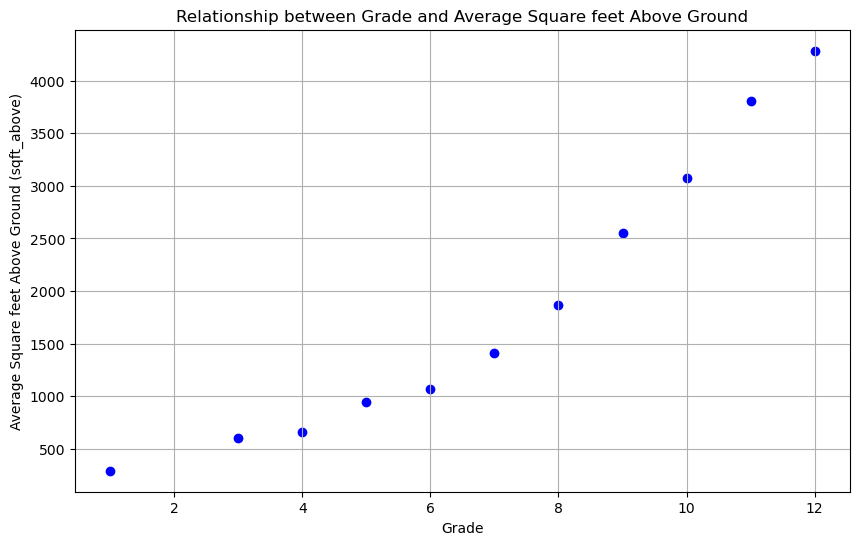

In [143]:
average_sqft_above_by_grade = df.groupby('grade')['sqft_above'].mean().reset_index()

# Plotting the relationship
plt.figure(figsize=(10, 6))
plt.scatter(average_sqft_above_by_grade['grade'], average_sqft_above_by_grade['sqft_above'], color='blue')
plt.title('Relationship between Grade and Average Square feet Above Ground')
plt.xlabel('Grade')
plt.ylabel('Average Square feet Above Ground (sqft_above)')
plt.grid(True)
plt.show()

This graph is a scatter plot showing the relationship between `Grade` (on the x-axis) and `Average Square feet Above Ground` (on the y-axis). The plot suggests a positive correlation, as the points tend to increase to the right; as the grade value increases, the average square feet above ground also tends to be higher, indicating that properties with a higher grade may have more above-ground living space.

## 6. How does the average size of interior housing living space for the closest 15 houses ('sqft_living15') vary across different house grades?

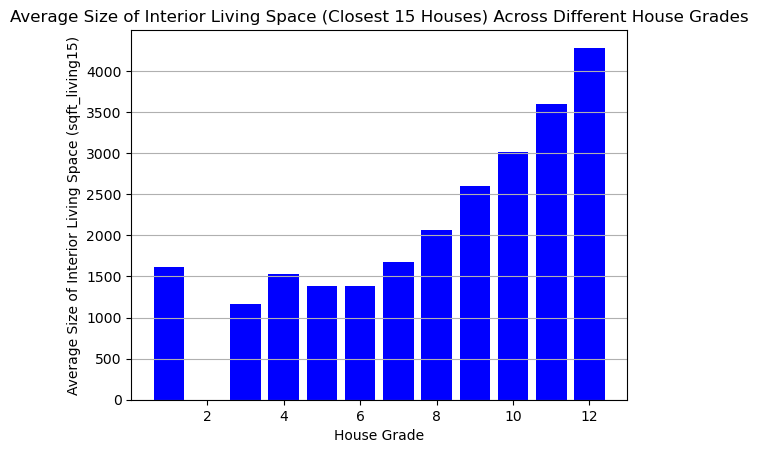

In [144]:
average_size_by_grade = df.groupby('grade')['sqft_living15'].mean().reset_index()

# Bar plot to visualize the variation in average 'sqft_living15' across different grades
plt.bar(average_size_by_grade['grade'], average_size_by_grade['sqft_living15'], color='blue')
plt.title('Average Size of Interior Living Space (Closest 15 Houses) Across Different House Grades')
plt.xlabel('House Grade')
plt.ylabel('Average Size of Interior Living Space (sqft_living15)')
plt.grid(axis='y')
plt.show()

This bar graph illustrates the variation in the average size of interior living space of the nearest 15 houses `(sqft_living15)` across different house grades. The x-axis represents the house grades, ranging from 1 to 13, and the y-axis shows the average interior living space in square feet. The bars increase in height as the house grades increase, suggesting a clear positive relationship where higher-grade houses tend to have larger average interior living spaces among the closest 15 houses. 

# Section 6-7: Model Training

In [145]:
features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15']

## K-Nearest Neighbors

In [146]:
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.fit_transform(X_test_unscaled)

The data is first split into train and test sets with 70% for the training data and 30% for the test data. After the data was split `X_train_unscaled` and `X_test_unscaled` were standardized using `StandardScaler` which transforms the data so that the mean is 0 and the standard deviation is 1.

In [147]:
# Create a KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions 
y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

# Evaluate the model
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f'Root Mean Squared Error (Train): {rmse_train}')
print(f'R-squared (Train): {r2_train}')

print(f'Root Mean Squared Error (Test): {rmse_test}')
print(f'R-squared (Test): {r2_test}')

Root Mean Squared Error (Train): 150627.8228872556
R-squared (Train): 0.6679068136836646
Root Mean Squared Error (Test): 185532.3187126235
R-squared (Test): 0.47121304612587456


K-Nearest Neighbors (KNN) regression model is created using scikit-learn's `KNeighborsRegressor`. The model is trained on `5 neighbors`. Predictions are then made on both the training and test sets, and the root mean squared error (RMSE) and R-squared values are calculated to evaluate the model's performance on both datasets.  The baseline KNN model, utilizing the Euclidean distance as the default metric, resulted in a root mean squared error (RMSE) of 150627.82 and an R-squared of 0.6679 on the training set, and an RMSE of 185532.32 with an R-squared of 0.4712 on the test set. The relatively close proximity of the RMSE values between the training and test sets suggests a balanced model, however, there can still be improvement to enhance its generalization to new data.

In [148]:
target_variable_range = df['price'].max() - df['price'].min()
rmse_percentage = (rmse_train / target_variable_range) * 100
print(f"RMSE Percentage (Train): {rmse_percentage:.2f}%")

rmse_percentage = (rmse_test / target_variable_range) * 100
print(f"RMSE Percentage (Test): {rmse_percentage:.2f}%")

RMSE Percentage (Train): 9.62%
RMSE Percentage (Test): 11.86%


This calculates the percentage of the Root Mean Squared Error (RMSE) relative to the range of the target variable `(house prices)`. It expresses how much the model's predictions deviate from the actual prices as a percentage of the entire price range.

### Hyperparameter Tuning

In [103]:
# Define a grid of hyperparameters to search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]}  

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Use the best model for predictions
best_knn_model = grid_search.best_estimator_

# Make predictions 
y_pred_train = best_knn_model.predict(X_train)
y_pred_test = best_knn_model.predict(X_test)

# Evaluate the model
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f'Root Mean Squared Error (Train): {rmse_train}')
print(f'R-squared: {r2_train}')

print(f'Root Mean Squared Error (Test): {rmse_test}')
print(f'R-squared: {r2_test}')

Best Hyperparameters: {'n_neighbors': 29}
Root Mean Squared Error (Train): 166085.2024968081
R-squared: 0.5962510111188204
Root Mean Squared Error (Test): 173099.1035547692
R-squared: 0.5397103338313559


Hyperparameter tuning is conducted for a K-Nearest Neighbors (KNN) model using `GridSearchCV`, specifically optimizing the number of neighbors `(n_neighbors)` across values [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]. The best hyperparameter obtained from the grid search is `{n_neighbors: 29}`. The optimized KNN model is then utilized for predictions, and its performance is evaluated, resulting in a root mean squared error (RMSE) of 166063.33 and an R-squared of 0.5964 on the training set, and an RMSE of 173207.15 with an R-squared of 0.5391 on the test set. 

In [104]:
target_variable_range = df['price'].max() - df['price'].min()
rmse_percentage = (rmse_train / target_variable_range) * 100
print(f"RMSE Percentage (Train): {rmse_percentage:.2f}%")

rmse_percentage = (rmse_test / target_variable_range) * 100
print(f"RMSE Percentage (Test): {rmse_percentage:.2f}%")

RMSE Percentage (Train): 10.61%
RMSE Percentage (Test): 11.06%


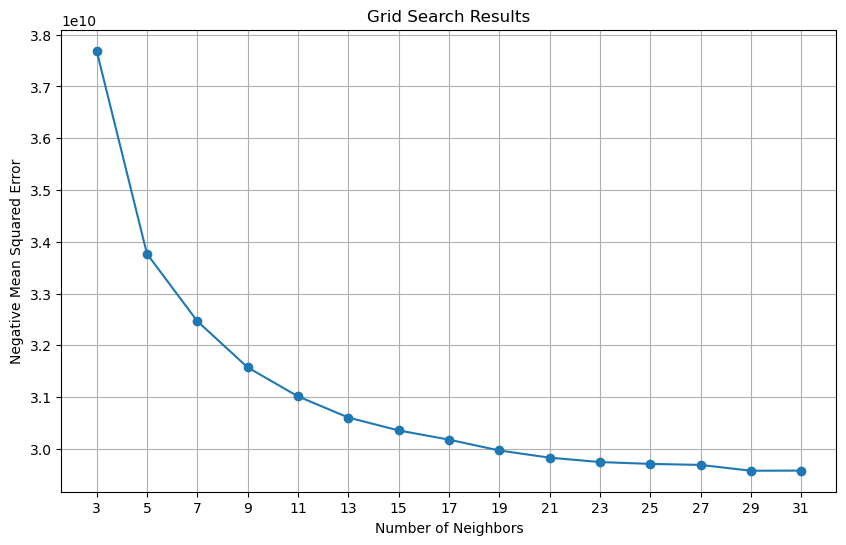

In [105]:
# Extract results from the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Plot the mean test scores
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], -results['mean_test_score'], marker='o')
plt.title('Grid Search Results')
plt.xlabel('Number of Neighbors')
plt.ylabel('Negative Mean Squared Error')
plt.xticks(param_grid['n_neighbors'])
plt.grid(True)
plt.show()

The graph above plots the mean test scores obtained from a grid search using GridSearchCV for a K-Nearest Neighbors (KNN) model. The x-axis represents the number of neighbors (n_neighbors), the y-axis shows the negative mean squared error, and each point on the plot corresponds to the mean test score for a specific number of neighbors. This visualization aids in identifying the optimal hyperparameter value for the KNN model.

## Linear Regression
Linear Regression was chosen for predicting `price` because of its ability to analyze the relationship between independent and dependent variables, the independent variables being `sqft_living`, `grade`, `sqft_above`, and `sqft_living15`, and the dependent variable being `price`.

In [106]:
from sklearn.base import BaseEstimator, TransformerMixin

class PolyFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, poly_order=1):
        self.poly_order = poly_order

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        f_transform = X

        for i in range(2, self.poly_order + 1):
            f_transform = np.column_stack((f_transform, np.power(X, i)))

        f_transform = np.column_stack((f_transform, np.ones(len(X))))

        return f_transform

The class `PolyFeatureTransformer` was declared to be able to include a polynomial feature transformation step when using sklearn's `make_pipeline` function. This allows the feature transformation step to be included in the training process already instead of having to store the transformed data in another variable first. The `make_pipeline`  function is useful when using sklearn's grid search and random search.

In [107]:
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.fit_transform(X_test_unscaled)

The data is first split into train and test sets with 70% for the training data and 30% for the test data. After the data was split `X_train_unscaled` and `X_test_unscaled` were standardized using `StandardScaler` which transforms the data so that the mean is 0 and the standard deviation is 1.

In [108]:
lasso = Lasso(alpha = 0.0001, max_iter = 100000)
model = make_pipeline(PolyFeatureTransformer(1), lasso)
model.fit(X_train, y_train)

Pipeline(steps=[('polyfeaturetransformer', PolyFeatureTransformer()),
                ('lasso', Lasso(alpha=0.0001, max_iter=100000))])

Regularization was used to prevent the model from overfitting on the training data. Lasso regularization was also chosen for its ability to do feature selection. This is useful for when the polynomial order increases which introduces complexity to the model. Lasso regression can identify and retain the most relevant polynomial features while setting others to zero.

The model was trained using the following hyperparameter configuration:

- alpha: 0.0001
- polynomial degree: 1

In [109]:
# Making predictions on the test set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluating the model
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"Root Mean Squared Error (Train): {rmse_train}")
print(f"Root Mean Squared Error (Test): {rmse_test}")

print(f'R-squared (Train): {r2_train}')
print(f'R-squared (Test): {r2_test}')

target_variable_range = df['price'].max() - df['price'].min()
normalized_rmse = (rmse_train / target_variable_range) * 100
print(f"Normalized RMSE (Train): {normalized_rmse:.2f}%")

normalized_rmse = (rmse_test / target_variable_range) * 100
print(f"Normalized RMSE Percentage (Test): {normalized_rmse:.2f}%")

Root Mean Squared Error (Train): 178093.13397710345
Root Mean Squared Error (Test): 178291.44474435484
R-squared (Train): 0.5357585436936944
R-squared (Test): 0.5116821546505215
Normalized RMSE (Train): 11.38%
Normalized RMSE Percentage (Test): 11.39%


### Hyperparameter Tuning

For hyperparameter tuning, random search was used to test the model on different hyperparameters. Random search works by randomly sampling hyperparameter configurations from a search space and testing the model from those configurations. The model's performance on the hyperparameter configurations is validated using cross-fold validation. Unlike grid search, random search is not an exhaustive search which is useful for when the search space has a high dimension.

The hyperparameters tested for this linear regression model were regularization parameter ($\lambda$ or $\alpha$) and the polynomial order. The regularization parameter was tested with these values 0.0001, 0.001, 0.01, 0.,1, and, 1.0. The polynomial order was tested from a range of 1 to 10 polynomial degrees.

Disclaimer: The code to around 40 minutes to run. Convert to code cell to run.

```
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'lasso__max_iter': [100000], 
    'polyfeaturetransformer__poly_order': range(1, 11) 
}

# Create the pipeline with PolynomialFeatures and Lasso
model = make_pipeline(
    PolyFeatureTransformer(),
    Lasso()
)

# Define the scoring metric (negative mean squared error to be maximized)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_dist, n_iter=10, scoring=scorer, cv=5, verbose=5, random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
```

Best Parameters: {'lasso__alpha': 0.001, 'lasso__max_iter': 100000, 'polynomialfeatures__degree': 3}

The code below plots the random search results as a heatmap.

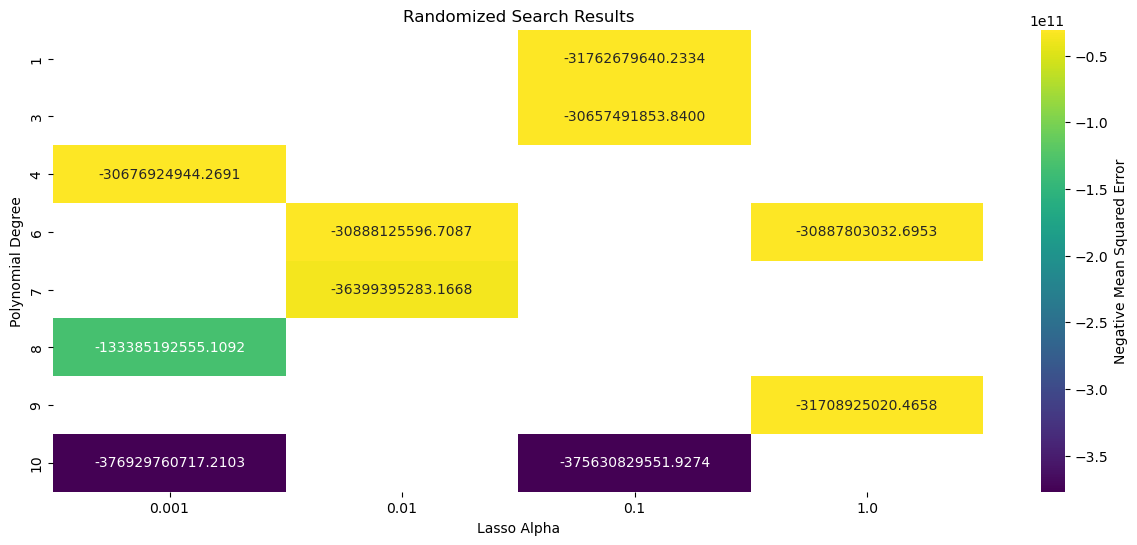

In [110]:
# results = pd.DataFrame(random_search.cv_results_) 
# results.to_csv('linear_random_search_results.csv', index=False)
results = pd.read_csv("linear_random_search_results.csv")


# Visualize the performance using a heatmap
heatmap_data = results.pivot(index='param_polyfeaturetransformer__poly_order', columns='param_lasso__alpha', values='mean_test_score')

plt.figure(figsize=(15, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="viridis", cbar_kws={'label': 'Negative Mean Squared Error'})
plt.title('Randomized Search Results')
plt.xlabel('Lasso Alpha')
plt.ylabel('Polynomial Degree')
plt.show()

The chart above is a heatmap showing the performance of each hyperparameter configuration. A higher negative mean squared error indicates a better performing model. Negative mean squared error was taken because in scikit-learn, the `make_scorer` function is designed to maximize the score. Since, the goal is to have the smallest possible mean squared error, the mean squared error is negated and the max score is interpreted as the best score.

The models with lower polynomial degrees seemed to perform better than those with a higher polynomial degree. As for the regularization parameter, there is no clear pattern for which alpha performs better.

The best configuration is as follows:

- alpha: 0.001
- polynomial degrees: 3


#### Model with Best Parameters

Training the model

In [111]:
lasso = Lasso(alpha = 0.001, max_iter = 100000)
model = make_pipeline(PolyFeatureTransformer(3), lasso)
model.fit(X_train, y_train)
# model = random_search.best_estimator_

Pipeline(steps=[('polyfeaturetransformer',
                 PolyFeatureTransformer(poly_order=3)),
                ('lasso', Lasso(alpha=0.001, max_iter=100000))])

Making predictions with the model

In [112]:
# Making predictions on the test set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluating the model
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"Root Mean Squared Error (Train): {rmse_train}")
print(f"Root Mean Squared Error (Test): {rmse_test}")

print(f'R-squared (Train): {r2_train}')
print(f'R-squared (Test): {r2_test}')

target_variable_range = df['price'].max() - df['price'].min()
normalized_rmse = (rmse_train / target_variable_range) * 100
print(f"Normalized RMSE (Train): {normalized_rmse:.2f}%")

normalized_rmse = (rmse_test / target_variable_range) * 100
print(f"Normalized RMSE Percentage (Test): {normalized_rmse:.2f}%")

Root Mean Squared Error (Train): 174790.06763594042
Root Mean Squared Error (Test): 175866.74853317958
R-squared (Train): 0.5528192830659163
R-squared (Test): 0.5248737163943569
Normalized RMSE (Train): 11.17%
Normalized RMSE Percentage (Test): 11.24%


The model is not overfitting because the test error is not significantly higher than the train error. The model is also not underfitting, however, this does not mean that the model fits the data extremely well. The $R^2$ score for the test is approximately 0.52 which means that some of the observed variations in the data are captured by the model, but it cannot explain a significant amount still. The normalized test RMSE is 11.24% which indicates that relative to the prices in the dataset, on average, the model as an error of 11.24%.

Given the context of the regression task, which is to predict house prices, an error rate of 11.24% is acceptable. This is because of the inherent complexities and uncertainties in real estate markets, which makes it difficult to make pinpoint predictions.

## Neural Network

For our third model, we decided to create a neural network because it can model complex non-linear relationships in the data. The relationship between house features and their prices is often non-linear and intricate. Neural networks can capture these complexities. Neural networks can adapt to various types of data and are capable of handling diverse input features. They are not limited to linear relationships and can adapt to different patterns present in the dataset.

### MLPRegressor
In this notebook, we chose to implement MLPRegressor() for our neural network. Here are the reasons why we chose it:

-  Since we're already using scikit-learn for other parts of our notebook, the MLPRegressor provides a convenient and consistent interface. This is beneficial for integration and ease of use.
- Multilayer Perceptron (MLP) models are capable of learning non-linear relationships in the data. This is important in predicting house prices, as the relationships between features (e.g., square footage, number of bedrooms) and the target variable (price) can be complex and non-linear.
- MLPRegressor allows us to customize the architecture of the neural network, such as the number of hidden layers and units in each layer. This flexibility gives us the ability to experiment with different hyperparameters to find the configuration that works best for our task.

Listed below are the default hyperparameters for MLPRegressor()

In [113]:
'''
MLPRegressor(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=1e-4,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8,
    n_iter_no_change=10,
    max_fun=15000
)
'''

"\nMLPRegressor(\n    hidden_layer_sizes=(100,),\n    activation='relu',\n    solver='adam',\n    alpha=0.0001,\n    batch_size='auto',\n    learning_rate='constant',\n    learning_rate_init=0.001,\n    power_t=0.5,\n    max_iter=200,\n    shuffle=True,\n    random_state=None,\n    tol=1e-4,\n    verbose=False,\n    warm_start=False,\n    momentum=0.9,\n    nesterovs_momentum=True,\n    early_stopping=False,\n    validation_fraction=0.1,\n    beta_1=0.9,\n    beta_2=0.999,\n    epsilon=1e-8,\n    n_iter_no_change=10,\n    max_fun=15000\n)\n"

First, let's set up our training and testing data by splitting the data and standardizing it.

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now, we set up our MLPRegressor model. Because we have thousands of data to look at and multiple features, finding initial parameters that would not take too long for the model to train took some trial and error. For creating the neural network, we set the hidden layer sizes to (50,50). This value means that there are two hidden layers, each with 50 neurons. The second parameter we set was the max number of iterations which was set to 5000. This was because after some trial and error, we realized that the model would not converge even after 2000 epochs which may be because of the complexity of the data. We also set the tol parameter, also known as the tolerance for optimization, as 0.01. This was also edited so that convergence can be reached within 5000 epochs. The code below took about 10 minutes to run.

In [115]:
mlp = MLPRegressor(hidden_layer_sizes=(50,50), max_iter=5000, alpha=0.0001, tol=0.01, random_state=42, verbose=True)
mlp.fit(X_train_scaled, y_train)

Iteration 1, loss = 163307673110.83325195
Iteration 2, loss = 163292021407.44473267
Iteration 3, loss = 163232915924.75622559
Iteration 4, loss = 163091614191.91778564
Iteration 5, loss = 162832784464.84725952
Iteration 6, loss = 162423578309.02343750
Iteration 7, loss = 161839319540.65164185
Iteration 8, loss = 161049997400.85668945
Iteration 9, loss = 160035275631.89877319
Iteration 10, loss = 158771173138.93176270
Iteration 11, loss = 157250368153.58599854
Iteration 12, loss = 155471840943.50756836
Iteration 13, loss = 153416083011.05911255
Iteration 14, loss = 151076356492.11016846
Iteration 15, loss = 148462323729.52117920
Iteration 16, loss = 145579343857.33120728
Iteration 17, loss = 142430149677.63626099
Iteration 18, loss = 139024331045.55059814
Iteration 19, loss = 135379649405.46379089
Iteration 20, loss = 131520157324.38928223
Iteration 21, loss = 127474524521.57049561
Iteration 22, loss = 123254579402.73999023
Iteration 23, loss = 118878733259.42257690
Iteration 24, loss =

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=5000, random_state=42,
             tol=0.01, verbose=True)

Our model has trained after 2348 epochs. Now let's see the RMSE and R^2 scores on the training and testing data.

In [116]:
y_pred_train = mlp.predict(X_train_scaled)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'Root Mean Squared Error (Train): {rmse_train}')

Root Mean Squared Error (Train): 171687.01425176085


In [117]:
y_pred_test = mlp.predict(X_test_scaled)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'Root Mean Squared Error (Test): {rmse_test}')

Root Mean Squared Error (Test): 172643.35324685407


In [118]:
target_variable_range = df['price'].max() - df['price'].min()
rmse_percentage = (rmse_train / target_variable_range) * 100
print(f"RMSE Percentage (Train): {rmse_percentage:.2f}%")

rmse_percentage = (rmse_test / target_variable_range) * 100
print(f"RMSE Percentage (Test): {rmse_percentage:.2f}%")

RMSE Percentage (Train): 10.97%
RMSE Percentage (Test): 11.03%


As we can see, the RMSE percentage for training and testing is considerably low. The RMSE for training indicates that, on average, the model's predictions on the training set deviate by approximately 10.97% of the average target variable value. A lower percentage suggests that the model is making relatively smaller errors on the training data. Similarly, the RMSE for testing indicates that, on average, the model's predictions on the test set deviate by approximately 11.03% of the average target variable value. This is slightly higher than the training RMSE percentage.

Because the difference between the training and testing data is small, we can suggest that the model is able to make predictions on the training data with a reasonably low level of error. The test RMSE percentage of 11.03% indicates how well the model generalizes to new, unseen data. A similar or slightly higher percentage on the test set suggests that the model is performing consistently across the training and test datasets. If the training RMSE percentage were significantly lower than the test RMSE percentage, it might suggest overfitting, where the model fits the training data too closely and struggles to generalize to new data. However, the small difference in this case indicates a reasonable generalization.

### Hyperparameter Tuning
Now, we move on to hyperparameter tuning. For this, we decided to use grid search. We previously tried random search but found that the parameters we got ended up performing worse than our initial model. This may be because grid search explores all possible combinations of hyperparameter values specified in the search space, while random search samples a fixed number of combinations randomly. If the optimal hyperparameter values lie on the grid, grid search is more likely to find them. The random initialization of hyperparameters in random search might lead to less fortunate initial combinations. Grid search, by exhaustively covering the search space, might have a higher chance of finding optimal combinations.

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The parameters we decided to test were the hidden layer sizes and the alpha size. The hidden layer sizes determine the number of neurons (or units) in each hidden layer of the neural network. Larger hidden layer sizes generally increase the capacity of the model to learn intricate patterns in the training data. However, excessively large architectures might lead to overfitting, especially when the dataset is limited. Alpha controls the amount of regularization applied to the neural network which helps prevent overfitting by penalizing large weights in the network. A higher alpha value increases the strength of regularization, which can be useful when dealing with overfitting. Regularization encourages the model to prefer simpler weight configurations, reducing the risk of fitting noise in the training data.

Though we could have tested more parameters, we left the other parameters as the default because training with 5000 iterations definitely increased the time it took to find the best parameters. We also noticed that in prevoius attempts of hyperparameter tuning, some of the results that came out as the best hyper parameters were simply the default of MLPRegressor. The code below took 416 minutes to complete.

In [120]:
""" 
# Hyperparameter search space
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50), (100,100)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [1e-4, 1e-3, 1e-2],
    'tol': [0.01],
    'max_iter': [5000],
}

mlp = MLPRegressor(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    mlp,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

best_mlp = grid_search.best_estimator_
"""

' \n# Hyperparameter search space\nparam_grid = {\n    \'hidden_layer_sizes\': [(100,), (100, 50), (50, 50), (100,100)],\n    \'activation\': [\'relu\'],\n    \'solver\': [\'adam\'],\n    \'alpha\': [1e-4, 1e-3, 1e-2],\n    \'tol\': [0.01],\n    \'max_iter\': [5000],\n}\n\nmlp = MLPRegressor(random_state=42)\n\n# Grid search with 5-fold cross-validation\ngrid_search = GridSearchCV(\n    mlp,\n    param_grid=param_grid,\n    cv=5,\n    scoring=\'neg_mean_squared_error\'\n)\n\ngrid_search.fit(X_train_scaled, y_train)\n\n# Print the best parameters\nprint("Best parameters found: ", grid_search.best_params_)\n\nbest_mlp = grid_search.best_estimator_\n'

```
Best parameters found:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}
```

After running the code, we see that the best hyper parameters are almost the same as our initial model but the only difference is the hidden layer sizes. Let's try to visualize it

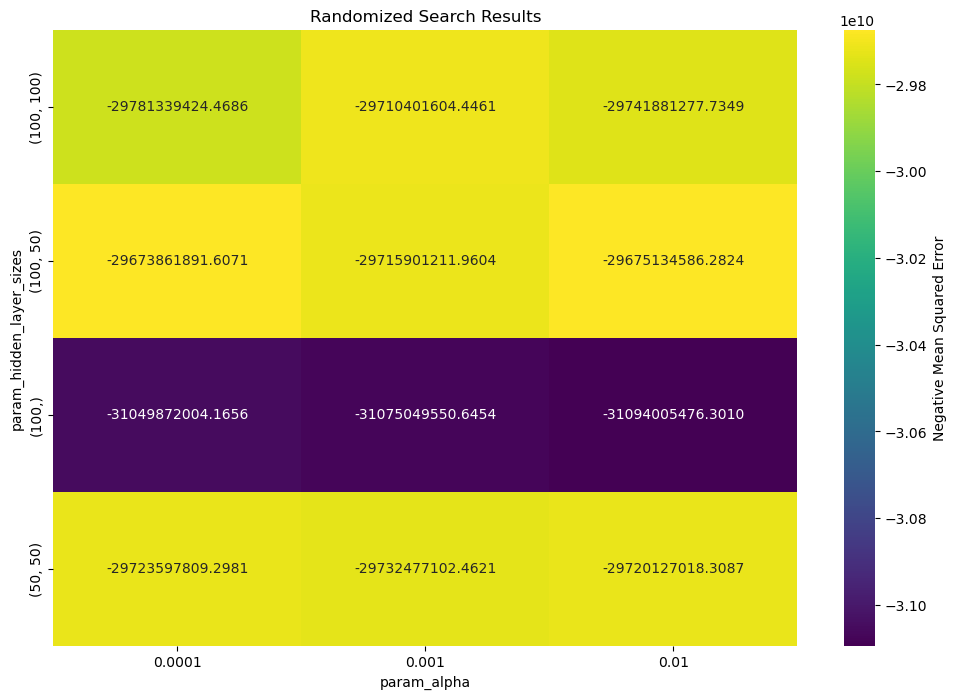

In [121]:
# Extract results from the randomized search
#results = pd.DataFrame(grid_search.cv_results_)
#results.to_csv('nn_grid_search_results.csv', index=False)

results = pd.read_csv("nn_grid_search_results.csv")

# Choose two hyperparameters for the heatmap (e.g., hidden_layer_sizes and learning_rate_init)
param1 = 'param_hidden_layer_sizes'
param2 = 'param_alpha'

# Create a heatmap
heatmap_data = results.pivot_table(index=param1, columns=param2, values='mean_test_score')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="viridis", cbar_kws={'label': 'Negative Mean Squared Error'})
plt.title('Randomized Search Results')
plt.xlabel(param2)
plt.ylabel(param1)
plt.show()

Here, we use a heatmap to visualize our findings. In this heatmap, we see how each combination of alpha and hidden_layer_sizes performs. The negative mean squared error was taken because in scikit-learn, the make_scorer function is designed to maximize the score. Since the goal is to have the smallest possible mean squared error, the mean square error is negated and the max score is interpreted as the best score.

The model with only one hidden layer, specifically set to the default of MLPRegressor, has stood out to be worst hyper parameter. When using two layers, we can see that the performance is more similar, especially between the hidden layer sizes of (100,50) and (50,50). As for the alpha, there's no constant pattern as alpha increases and the differences between the values are not noticeable at first.

The best configuration is as follows:
- alpha: 0.0001
- hidden_layer_sizes: (100, 50)

#### Model with Best Parameters

In [122]:
#best_mlp = grid_search.best_estimator_
best_mlp = MLPRegressor(hidden_layer_sizes=(100,50), max_iter=5000, alpha=0.0001, tol=0.01, random_state=42, verbose=True)
best_mlp.fit(X_train_scaled, y_train)

Iteration 1, loss = 163306933191.79183960
Iteration 2, loss = 163279514291.87960815
Iteration 3, loss = 163170473436.04223633
Iteration 4, loss = 162908127078.57824707
Iteration 5, loss = 162427454116.28137207
Iteration 6, loss = 161661814174.95007324
Iteration 7, loss = 160554668532.52658081
Iteration 8, loss = 159053343638.08959961
Iteration 9, loss = 157125050518.29257202
Iteration 10, loss = 154742565426.43243408
Iteration 11, loss = 151892160336.03573608
Iteration 12, loss = 148565413349.78359985
Iteration 13, loss = 144770823376.25576782
Iteration 14, loss = 140512017274.29406738
Iteration 15, loss = 135836077105.17369080
Iteration 16, loss = 130779668551.20661926
Iteration 17, loss = 125381974106.40234375
Iteration 18, loss = 119695333047.28707886
Iteration 19, loss = 113803176852.95494080
Iteration 20, loss = 107760240671.88619995
Iteration 21, loss = 101656187662.91093445
Iteration 22, loss = 95542978467.04913330
Iteration 23, loss = 89529312962.55818176
Iteration 24, loss = 8

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=5000, random_state=42,
             tol=0.01, verbose=True)

In [123]:
y_pred_train = best_mlp.predict(X_train_scaled)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'Root Mean Squared Error (Train): {rmse_train}')

Root Mean Squared Error (Train): 171523.50160978502


In [124]:
y_pred_test = best_mlp.predict(X_test_scaled)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'Root Mean Squared Error (Test): {rmse_test}')

Root Mean Squared Error (Test): 172483.84981992806


In [125]:
target_variable_range = df['price'].max() - df['price'].min()
rmse_percentage = (rmse_train / target_variable_range) * 100
print(f"RMSE Percentage (Train): {rmse_percentage:.2f}%")

rmse_percentage = (rmse_test / target_variable_range) * 100
print(f"RMSE Percentage (Test): {rmse_percentage:.2f}%")

RMSE Percentage (Train): 10.96%
RMSE Percentage (Test): 11.02%


After training the model with the new hyper parameters, we can see that the difference is very miniscule. For reference, these are the results before and after

*Before:*
- RMSE Percentage (Train): 10.97%
- RMSE Percentage (Test): 11.03%

*After:*
- RMSE Percentage (Train): 10.96%
- RMSE Percentage (Test): 11.02%

Both RMSE train and test percentages only improved by 1%.

The small difference in RMSE percentages before and after applying grid search for hyperparameter tuning suggests that the hyperparameters selected by the grid search did not lead to a significant improvement in model performance compared to the initial set of hyperparameters. There are several possible reasons for this:

- The small search space may have limited the potential for finding significantly better hyperparameters. 
- Other hyperparameters were not tested which may have improved results.
- The dataset may not have been highly sensitive to certain hyperparameter values.

After obtaining these results, we can still say that since the training and test RMSEs are close in value, this suggests that the model is generalizing reasonably well to unseen data. The small difference between training and testing RMSE percentages can indicate a low risk of overfitting.

# Section 8: Model Selection

Below are the best hyperparameters/parameters per model:

|  | KNN | Linear Regression | Neural Networks |
| --- | --- | --- | --- |
| Best Parameters | n_neighbors = 31 | Regularization parameter ($\lambda$) = 0.001 | hidden_layer_sizes = (100,50) |
| | | Polynomial Order = 3 | alpha = 0.0001 |

Below are the RMSE scores for each model before and after performing hyper parameter tuning:

## RMSE on Baseline Models

|  | KNN | Linear Regression | Neural Networks |
| --- | --- | --- | --- |
| Train | 9.62% | 11.38% | 10.97% |
| Test | 11.86% | 11.39% | 11.03% |

## RMSE on Best Configured Parameters

|  | KNN | Linear Regression | Neural Networks |
| --- | --- | --- | --- |
| Train | 10.61% | 11.17% | 10.96% |
| Test | 11.06% | 11.24% | 11.02% |

KNN, Linear Regression, and Neural Network were used to predict the house prices in King County based on the features, `sqft_living`, `grade`, `sqft_above`, and `sqft_living15`. The KNN model had the best performance. The decision is based on the normalized Root Mean Square Error (RMSE) values for both the training and testing datasets. In regression problems, lower RMSE indicates better predictive performance.

In terms of training performance, KNN achieved the lowest RMSE at 10.61%, indicating better accuracy compared to Linear Regression (11.17%) and Neural Network (10.96%). For the testing dataset, while the Neural Network exhibited a slightly lower RMSE at 11.02% compared to KNN's 11.06%, the difference is marginal. Therefore, the KNN model outperforms both Linear Regression and Neural Network in terms of training performance and maintains competitive results in testing. 

In addition, time complexity of the models revealed that the neural network took approximately 10 minutes longer to train. While training time alone is not a definitive measure of model performance, the extended training duration of the neural network without significant improvement in RMSE suggests that KNN may be more efficient for this specific task. 

KNN is a simpler model than linear regression and neural network as it makes predictions based on the similarity of data points. It predicts the value of a new data point by considering the values of its K nearest neighbors in the training dataset. The K nearest neighbors was calculated by first getting the Euclidean distance between each new data point in the test dataset and all data points in the training dataset. The neighbors were selected by sorting the distances in ascending order and choosing the K data points with the shortest distances. Predictions were based on the average of the values of the K neighbors.

The other two models may have performed worse for the following reasons. Linear regression assumes a linear relationship between the features and the target variable, which may not always hold. The pattern it was trying to capture may have been more complex and non-linear. Neural networks are capable of handing complex patterns but requires careful tuning of hyperparameters. After trial and error of trying to find the best hyperparameters for the neural network, the best hyperparameters ended up having a very small and insignifanct increase in performance. This may have been because other hyperparameters like `learning_rate` and `learning_rate_init` were not tested. The features tested also may not have been highly sensitive to certain hyperparameter values. For example, the values for the grid search could have been expanded to explore smaller alpha values.These drawbacks highlight the simplicity and effectiveness of KNN in predicting the house prices.

# Section 9: Insights and Conclusions

The training models on the dataset reveal several insightful observations. In this notebook, a baseline model was trained before finding the best hyperparameters for the model. Firstly, the initial model results lacked accuracy. This may be due to the selected features used in training. To enhance predictive performance,  other features can be used, considering that certain features may have more impact on predicting house prices. Additionally, experimenting with different feature engineering methods beyond relying solely on a correlation matrix can uncover more nuanced patterns in the data and improved feature selection. 

Based on the previous section, KNN model was found to have performed the best with the data. The second best performing model is the Neural Network model, followed by Linear Regression model, exhibiting the best Root Mean Squared Error (RMSE) scores. This success is attributed to KNN's capability to leverage similarities among houses, making it particularly effective in predicting prices based on comparable properties.

To enhance model performance, recommendations include a broader exploration of the n_neighbors hyperparameter for KNN to achieve a better balance between overfitting and generalization. Additionally, further experimentation with feature selection is emphasized to uncover additional variables or combinations contributing to improved predictive accuracy.

# Section 10: References
- GeeksforGeeks. “K-Nearest Neighbours - GeeksforGeeks.” GeeksforGeeks, 13 Nov. 2018, www.geeksforgeeks.org/k-nearest-neighbours/.
- “Sklearn.model_selection.GridSearchCV — Scikit-Learn 0.22 Documentation.” Scikit-Learn.org, 2019, scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- “Sklearn.neighbors.KNeighborsRegressor — Scikit-Learn 0.22 Documentation.” Scikit-Learn.org, 2019, scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html.
- “Sklearn.linear_model.Lasso.” Scikit-Learn, scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html.
- “Sklearn.neural_network.MLPRegressor — Scikit-Learn 0.21.3 Documentation.” Scikit-Learn.org, 2010, scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.